In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.tabular import TabularQLearner
from tournament.agents.tft import (
    TFTT,
    TTFT,
    GenerousTFT,
    GradualTFT,
    OmegaTFT,
    TitForTat,
)
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.tournament import RoundRobinTournament

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
env = MultipleRuleBasedAgentEnvironment([
    TitForTat,
    # AllC,
    # TFTT,
    # TTFT,
    # GenerousTFT,
    # GradualTFT,
    OmegaTFT,
])

In [3]:
class TabularLearnerTest(TabularQLearner):
    def __init__(self):
        super().__init__()
        self._lookback = 5
        self._epsilon = 0.2

agent = TabularLearnerTest()

In [4]:
env.train(
    trainee=agent,
    continuation_probability=1,
    limit=250,
    noise=0,
    repetitions=100,
    epochs=100,
)

[17:01:16] Commencement of training.
[17:01:17] Completed epoch 1: None
[17:01:17] Completed epoch 2: None
[17:01:18] Completed epoch 3: None
[17:01:19] Completed epoch 4: None
[17:01:19] Completed epoch 5: None
[17:01:20] Completed epoch 6: None
[17:01:21] Completed epoch 7: None
[17:01:22] Completed epoch 8: None
[17:01:23] Completed epoch 9: None
[17:01:23] Completed epoch 10: None
[17:01:24] Completed epoch 11: None
[17:01:25] Completed epoch 12: None
[17:01:25] Completed epoch 13: None
[17:01:26] Completed epoch 14: None
[17:01:26] Completed epoch 15: None
[17:01:27] Completed epoch 16: None
[17:01:28] Completed epoch 17: None
[17:01:28] Completed epoch 18: None
[17:01:29] Completed epoch 19: None
[17:01:30] Completed epoch 20: None
[17:01:31] Completed epoch 21: None
[17:01:31] Completed epoch 22: None
[17:01:32] Completed epoch 23: None
[17:01:32] Completed epoch 24: None
[17:01:33] Completed epoch 25: None
[17:01:34] Completed epoch 26: None
[17:01:34] Completed epoch 27: None


In [5]:
print(env.counts)

s = sum(env.counts.values())

print({a: env.counts[a] / s for a in env.counts})

{<Action.COOPERATE: 0>: 2722184, <Action.DEFECT: 1>: 2277816}
{<Action.COOPERATE: 0>: 0.5444368, <Action.DEFECT: 1>: 0.4555632}


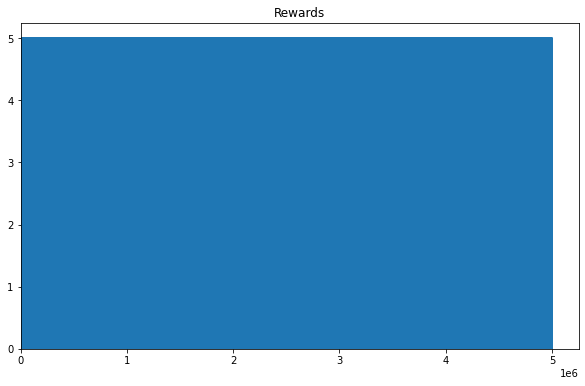

In [6]:
plt.title("Rewards")
plt.plot(env.rewards)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

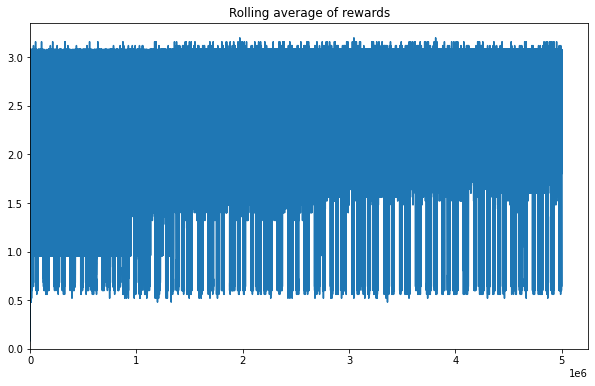

In [7]:
N = 25

plt.title("Rolling average of rewards")
plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

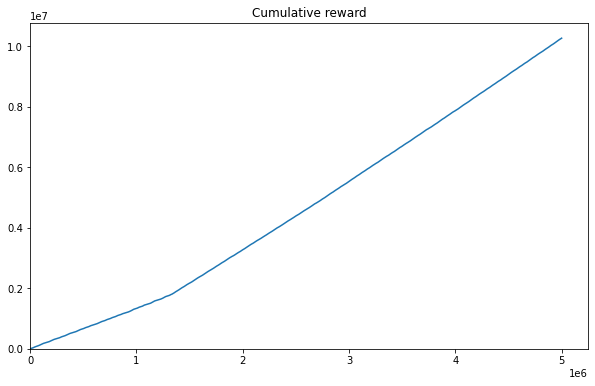

In [8]:
plt.title("Cumulative reward")
plt.plot(np.cumsum(env.rewards))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

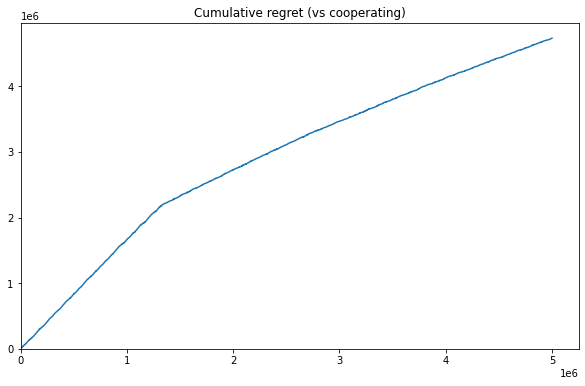

In [9]:
plt.title("Cumulative regret (vs cooperating)")
plt.plot(np.cumsum(3 - np.array(env.rewards)))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [10]:
tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=20, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [00:22<00:00, 43.02matches/s] 

GraaskampAndKatzen        809                  5.078562000000001   
Shubik                         801                  4.829480999999998   
TidemanAndChieruzzi2    798                  5.996077999999998   
Weiner                 792                  14.678677999999996  
Borufsen                       791                  5.100016            
SteinAndRapoport               785                  18.797611000000003  
GenerousTFT                    778                  4.133113999999999   
TidemanAndChieruzzi            778                  5.6897040000000025  
Black              777                  6.630875000000001   
OmegaTFT                       776                  5.5595669999999995  
TitForTat                      773                  4.005747999999999   
Davis                          770                  7.8917889999999975  
TTFT                           770                  4.625595000000001   
TFTT                           763                  4.233364            
White     